<a href="https://colab.research.google.com/github/nikitachaudharicodes/MLCR-HELP_International/blob/main/MLCR_HELP_International.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning: Clustering & Retrieval 
##Project: Find Countries that Need and Deserve AID for HELP **International**

In [1]:
import warnings 
warnings.filterwarnings('ignore')

##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

##Import your **data**

In [3]:
country_df = pd.read_csv(r'https://cdn.upgrad.com/UpGrad/temp/2f181ade-814a-430a-b721-769d6a9bf814/Country-data.csv')
country_df.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [5]:
country_df.shape

(167, 10)

In [6]:
country_df.country.nunique()

167

In [7]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
for i in ['imports','exports','health']:
    country_df[i] = (country_df[i] * country_df['gdpp'])/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


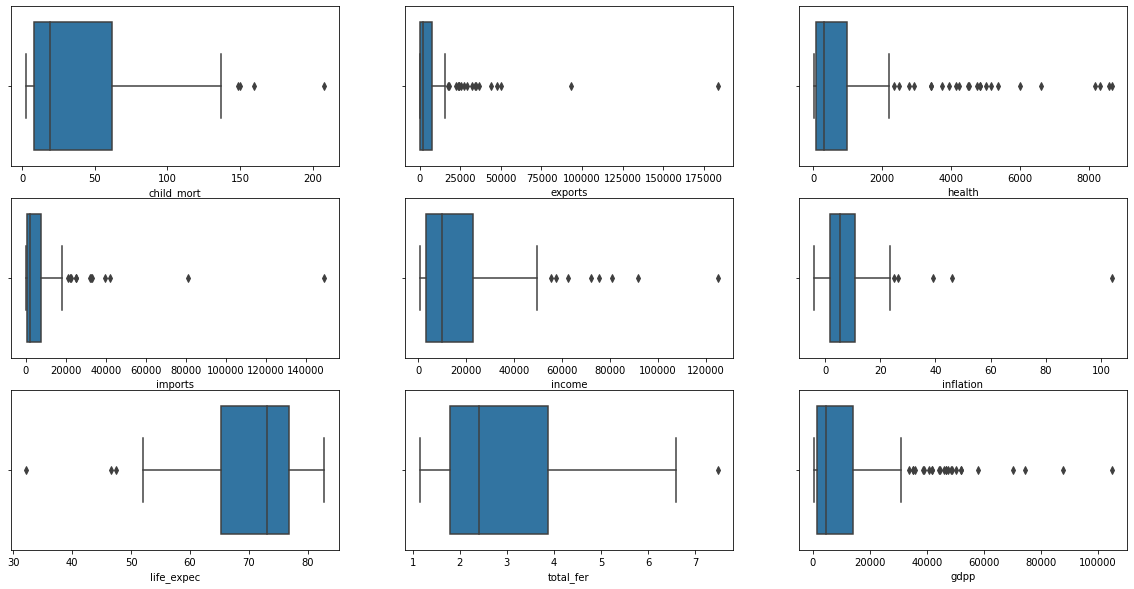

In [11]:
plt.figure(figsize = (20,10))
for i in enumerate(country_df.columns[1:]): #haven't included first cloumn as it is country, hence, dropped it
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country_df[i[1]])

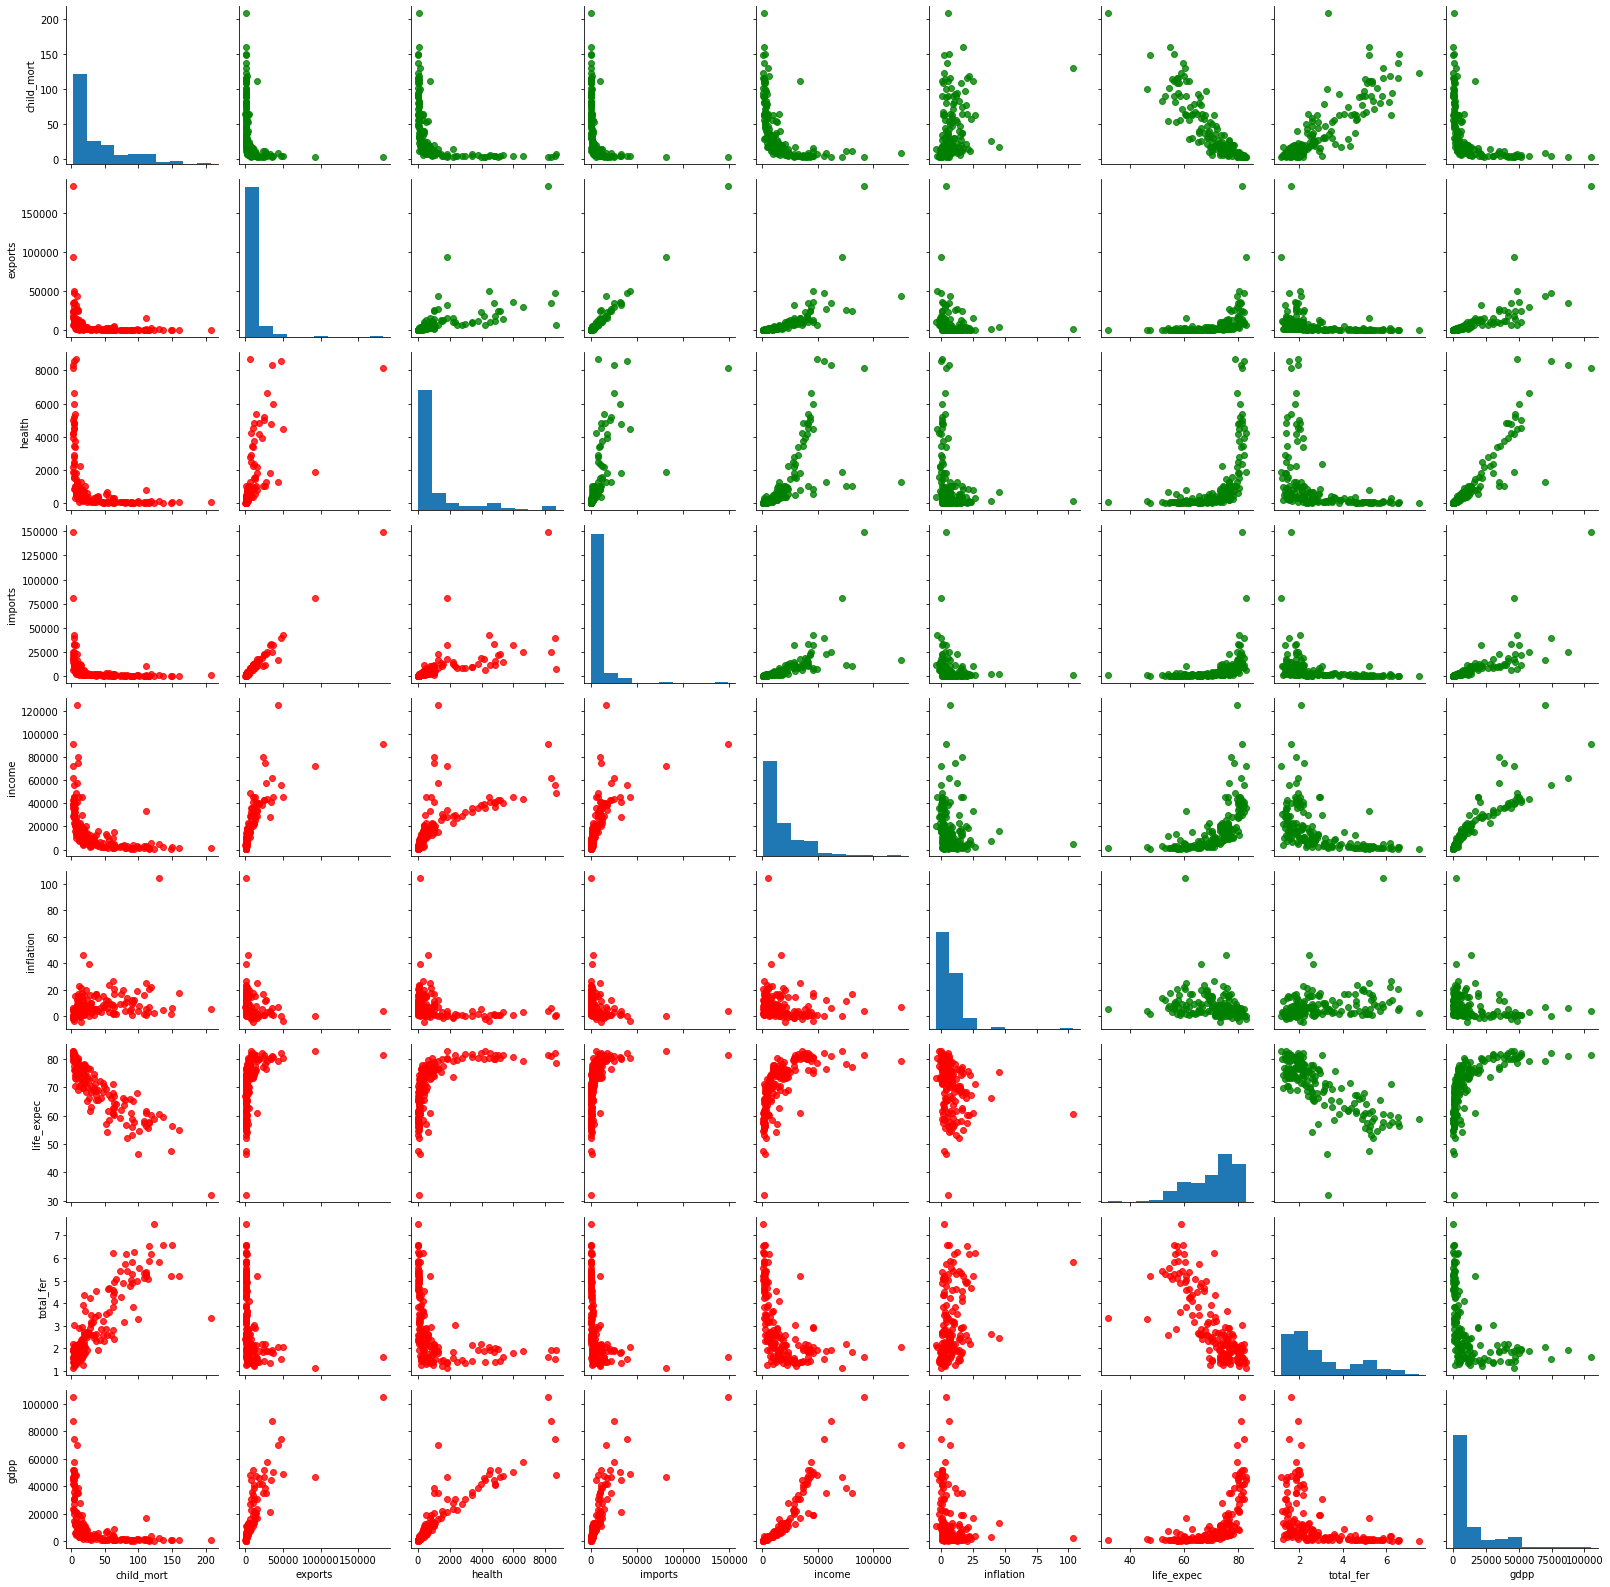

In [12]:
num_df = country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation','life_expec', 'total_fer', 'gdpp']]
pair = sns.PairGrid(num_df)
pair.map_upper(sns.regplot,color ='green', fit_reg = False)
pair.map_lower(sns.regplot, color ='red', fit_reg = False)
pair.map_diag(plt.hist)
plt.show()

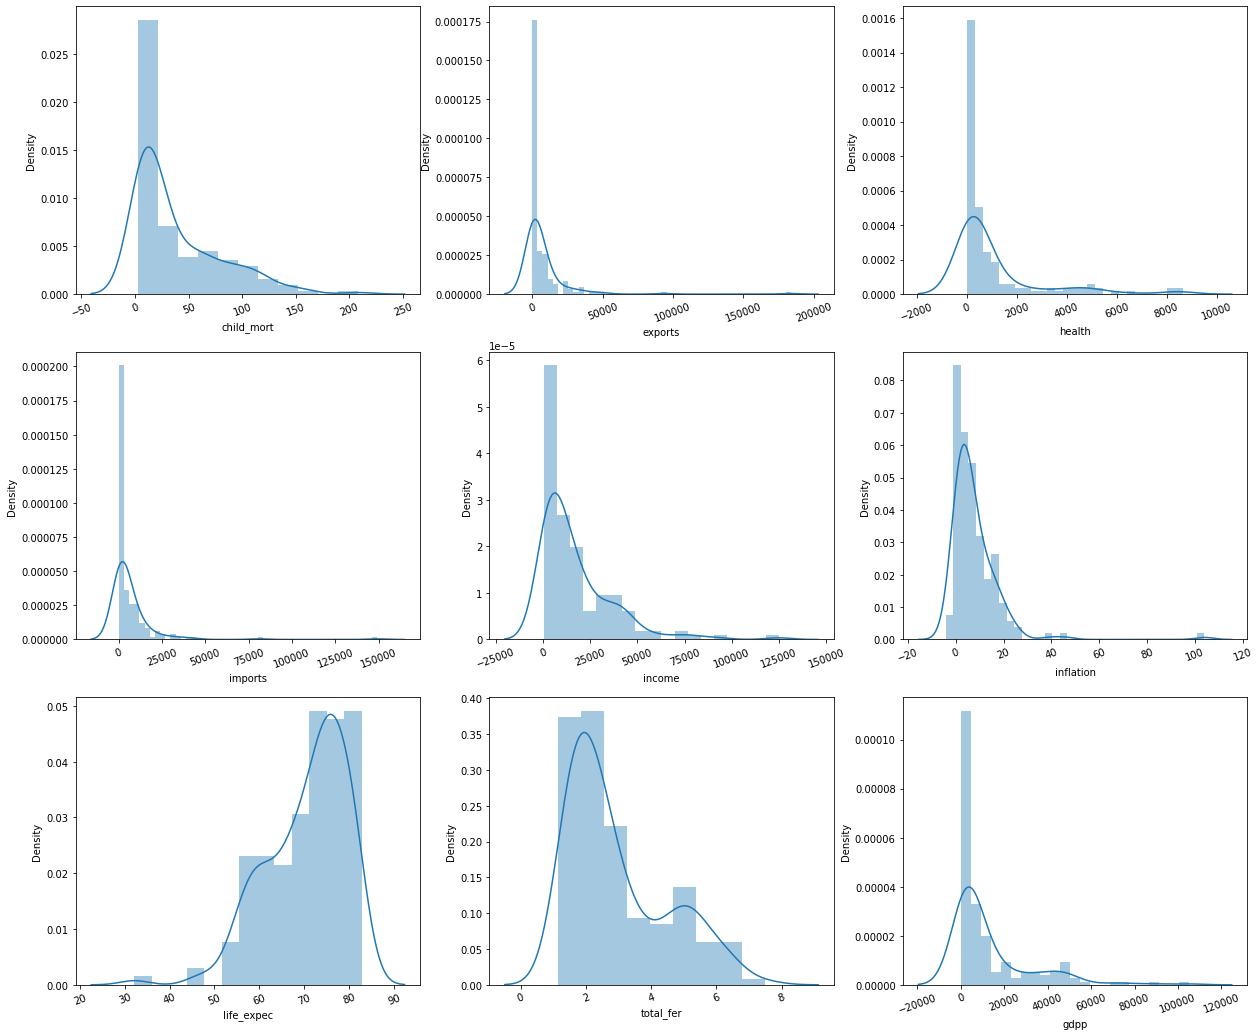

In [13]:
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(num_df[i[1]])
    plt.xticks(rotation=20)

In [14]:
new_country_df = country_df[country_df.columns[country_df.dtypes != 'object']] 
new_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [15]:
new_country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##PreProcessing using Standard Scalar

In [16]:
# instantiate 
scaler = StandardScaler()
# fit_transform : Standard scalar standardizes features of the data set by scaling to unit variance and removing the mean (optionally) using column summary statistics on the samples in the training set.
scaled_data = pd.DataFrame(scaler.fit_transform(new_country_df))
scaled_data.columns = country_df.columns[country_df.dtypes != 'object']
scaled_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


##Hopkins Test for Hierarchical Clustering

In [17]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins_test(X):
    d = X.shape[1]
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [18]:
#Using the Hopkins Statistic function by passing the above dataframe as a parameter
hopkins_test(scaled_data)

0.9357715786087147

##Hierarchical Clustering

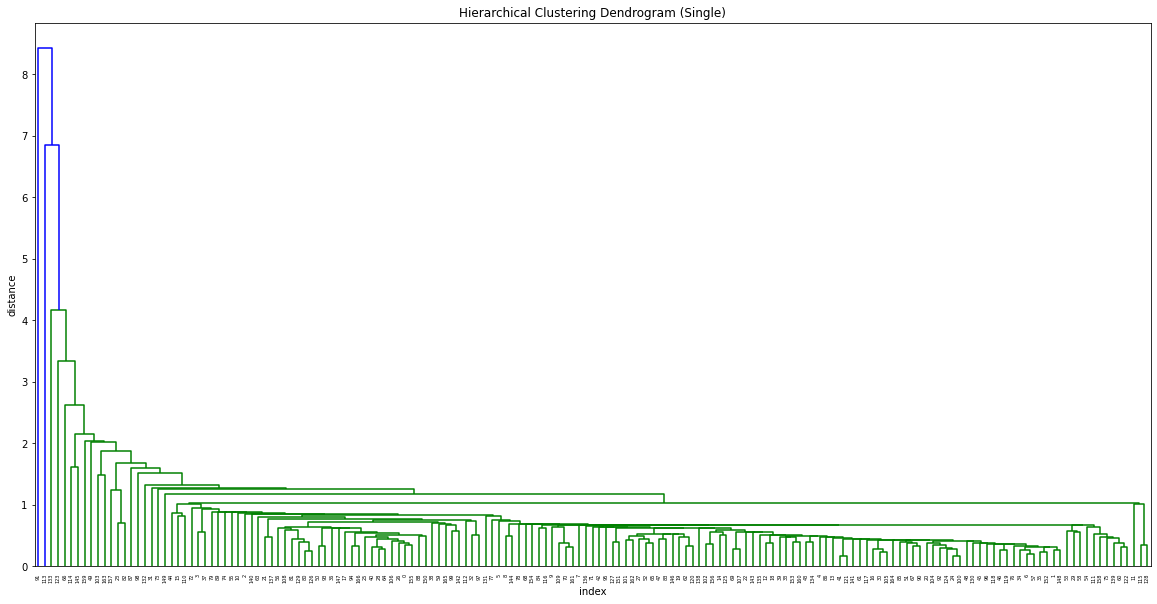

In [21]:
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram (Single)')
plt.xlabel('index')
plt.ylabel('distance')
merging_s = linkage(scaled_data, method="single", metric='euclidean')
dendrogram(merging_s)
plt.show()

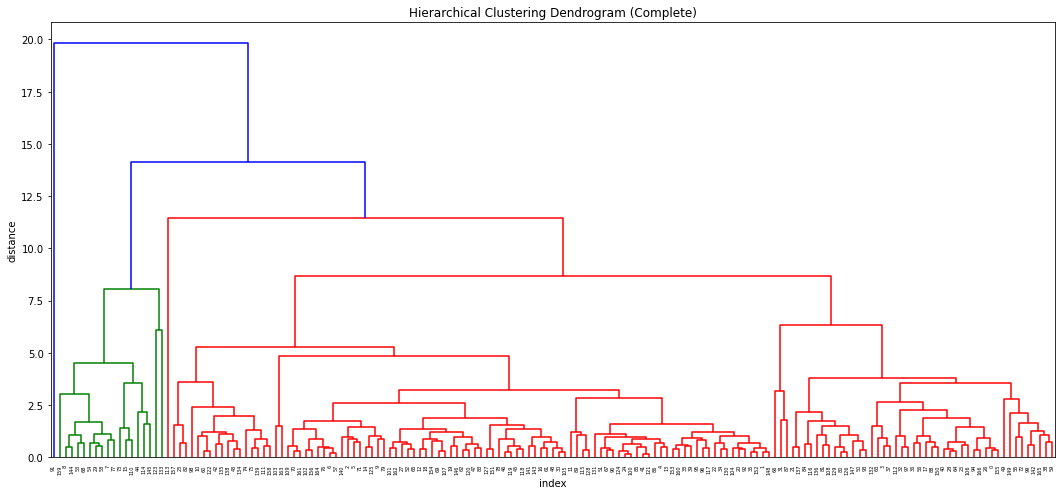

In [22]:
plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram (Complete)')
plt.xlabel('index')
plt.ylabel('distance')
merging_c = linkage(scaled_data, method="complete", metric='euclidean')
dendrogram(merging_c)
plt.show()


In [23]:
cluster_label_3 = cut_tree(merging_c, n_clusters = 3).reshape(-1,)
cluster_label_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [24]:
country_data_h = country_df.copy()
country_data_h['cluster_label_3'] = cluster_label_3
country_data_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


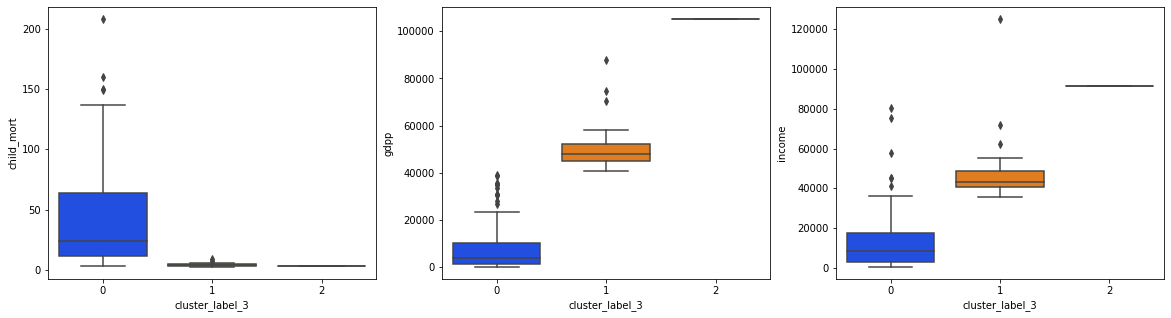

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_label_3', y='child_mort', data=country_data_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_label_3', y='gdpp', data=country_data_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_label_3', y='income', data=country_data_h, palette="bright")

plt.show()

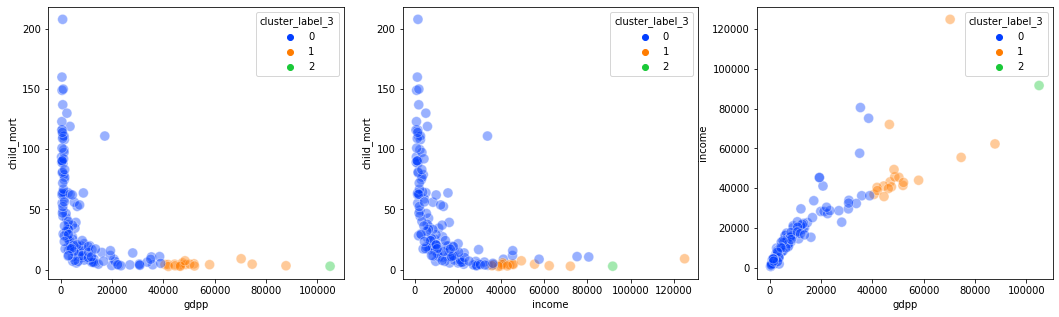

In [26]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label_3',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_label_3',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_label_3',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [27]:
country_data_h.cluster_label_3.value_counts()

0    148
1     18
2      1
Name: cluster_label_3, dtype: int64

In [28]:
country_data_h[country_data_h['cluster_label_3'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [29]:
country_data_h[country_data_h['cluster_label_3'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1


In [30]:
cluster_label_4 = cut_tree(merging_c, n_clusters = 4).reshape(-1,)
cluster_label_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [31]:
country_data_h['cluster_label_4'] = cluster_label_4

country_data_h.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


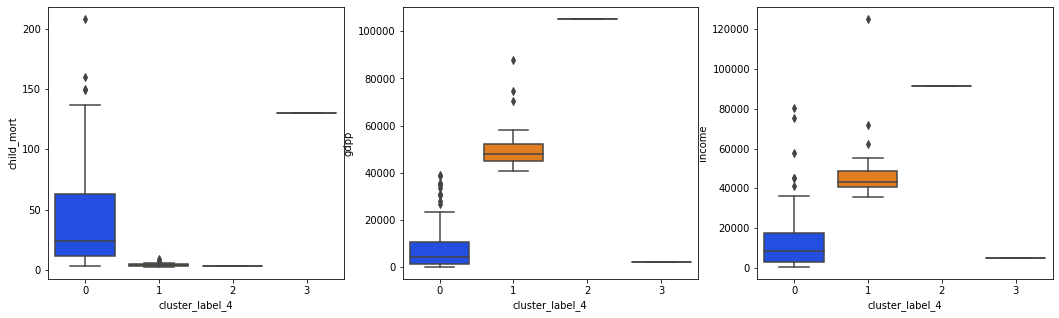

In [32]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_label_4', y='child_mort', data=country_data_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_label_4', y='gdpp', data=country_data_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_label_4', y='income', data=country_data_h, palette="bright")

plt.show()

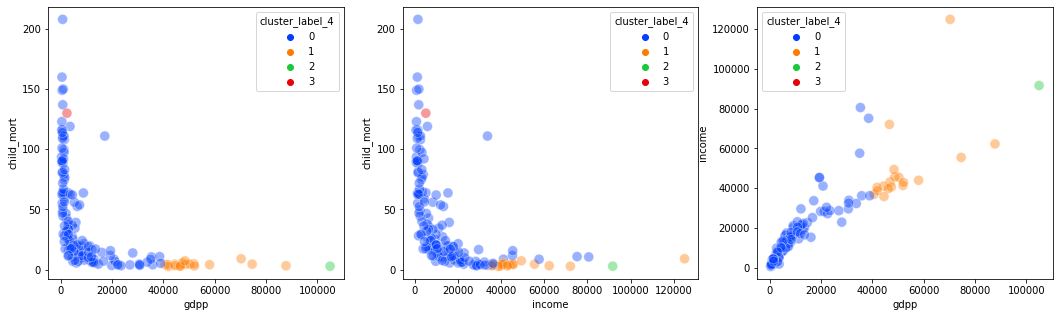

In [33]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_label_4',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_label_4',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_label_4',
                data=country_data_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [34]:
country_data_h.cluster_label_4.value_counts()


0    147
1     18
2      1
3      1
Name: cluster_label_4, dtype: int64

In [35]:
country_data_h[country_data_h['cluster_label_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


In [36]:
country_data_h[country_data_h['cluster_label_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,3


In [37]:
country_data_h[country_data_h['cluster_label_4'] == 1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1,1


In [38]:
cntry_data_h_analysis = country_data_h.groupby(['cluster_label_3']).mean()
cntry_data_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_4
cluster_label_3,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [39]:
# Creating a new field for count of observations in each cluster
cntry_data_h_analysis['Observations']=country_data_h[['cluster_label_3','child_mort']].groupby(['cluster_label_3']).count()
cntry_data_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_4,Observations
cluster_label_3,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [40]:
# Creating a new field for proportion of observations in each cluster
cntry_data_h_analysis['Proportion']=round(cntry_data_h_analysis['Observations']/cntry_data_h_analysis['Observations'].sum(),2)
cntry_data_h_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_4,Observations,Proportion
cluster_label_3,,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18,0.11
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1,0.01


<Figure size 720x360 with 0 Axes>

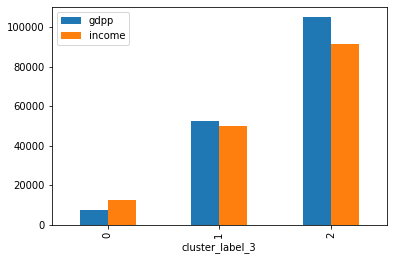

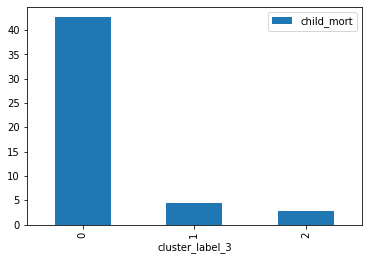

In [41]:
plt.figure(figsize=(10, 5))
cntry_data_h_plot1=country_data_h[['cluster_label_3','gdpp','income']].copy()
cntry_data_h_plot1=country_data_h_plot1.groupby('cluster_label_3').mean()
cntry_data_h_plot1.plot.bar()

cntry_data_h_plot2=country_data_h[['cluster_label_3','child_mort']].copy()
cntry_data_h_plot2=cntry_data_h_plot2.groupby('cluster_label_3').mean()
cntry_data_h_plot2.plot.bar()
plt.show()

##K-Means Clustering: Finding Optimal Number Of Clusters

Elbow Curve

Silhouette Analysis

In [43]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_data)  
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4340796716611797
For n_clusters=6, the silhouette score is 0.35242990554607045
For n_clusters=7, the silhouette score is 0.3089394309554937
For n_clusters=8, the silhouette score is 0.278032059328083


##K-means Clustering 
##No of Clusters=3

In [44]:
##K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(scaled_data)
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [45]:
## Create a new datafame with scaled data and adding country name to it.
cntry_data_k = country_data_h.copy()
cntry_data_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [46]:
## assigning the label
cntry_data_k['cluster_id_3'] = kmeans_3.labels_
cntry_data_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2


In [47]:
## Checking the number of countries in each cluster
cntry_data_k.cluster_id_3.value_counts()

2    91
0    48
1    28
Name: cluster_id_3, dtype: int64

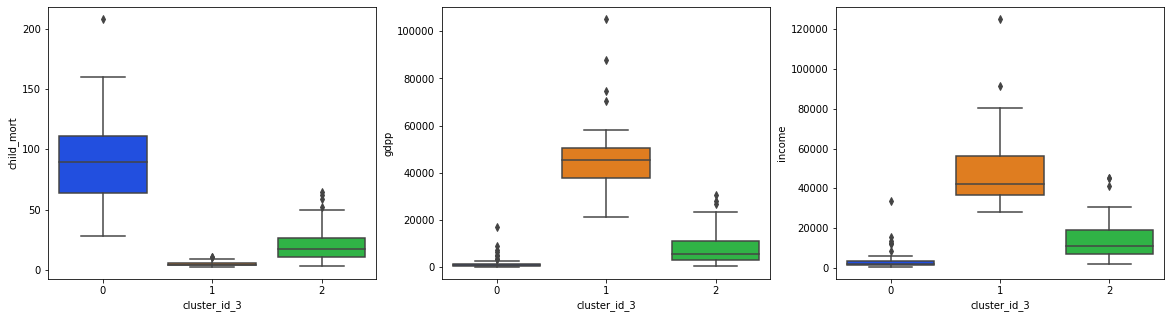

In [48]:
## Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=cntry_data_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=cntry_data_k, palette="bright")

plt.show()

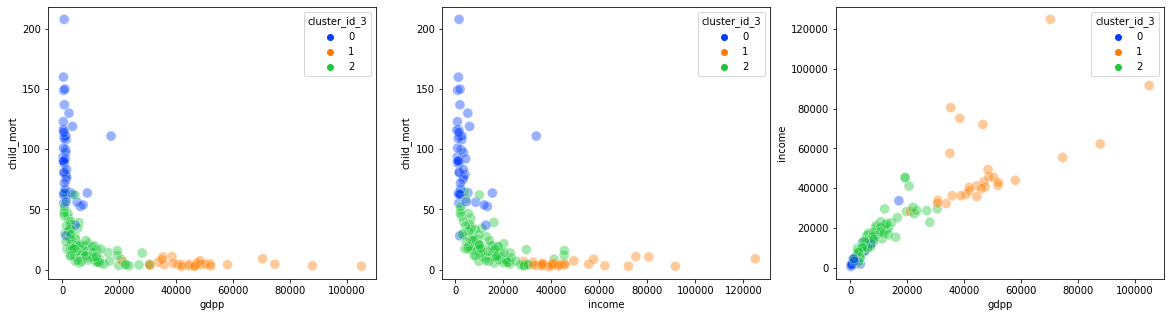

In [49]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [50]:
# Checking the CLuster means:
cntry_data_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4
cluster_id_3,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286


In [51]:
cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500
60,Greece,3.9,28700,26900
43,Czech Republic,3.4,28300,19800


In [52]:
cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


##K-means Clustering
##No. of Clusters=4

In [53]:
## K Means with with k=4
# kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
# kmeans_4.fit(scaled_data)
# kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [54]:
# assigning the label
# cntry_data_k['cluster_id_4'] = kmeans_4.labels_
# cntry_data_k.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2,0


In [55]:
# cntry_data_k.cluster_id_4.value_counts()

0    88
1    48
3    29
2     2
Name: cluster_id_4, dtype: int64

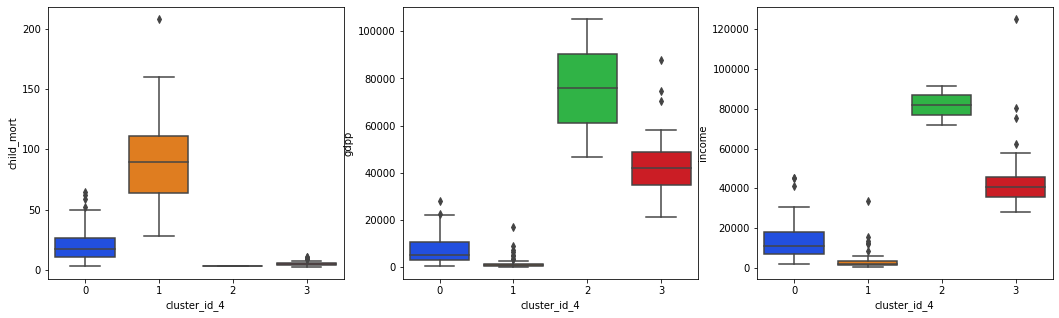

In [56]:
# plt.figure(figsize=(18, 5))
# plt.subplot(1, 3, 1)
# sns.boxplot(x='cluster_id_4', y='child_mort',
#             data=cntry_data_k, palette="bright")
# plt.subplot(1, 3, 2)
# sns.boxplot(x='cluster_id_4', y='gdpp',
#             data=cntry_data_k, palette="bright")
# plt.subplot(1, 3, 3)
# sns.boxplot(x='cluster_id_4', y='income',
#             data=cntry_data_k, palette="bright")

# plt.show()

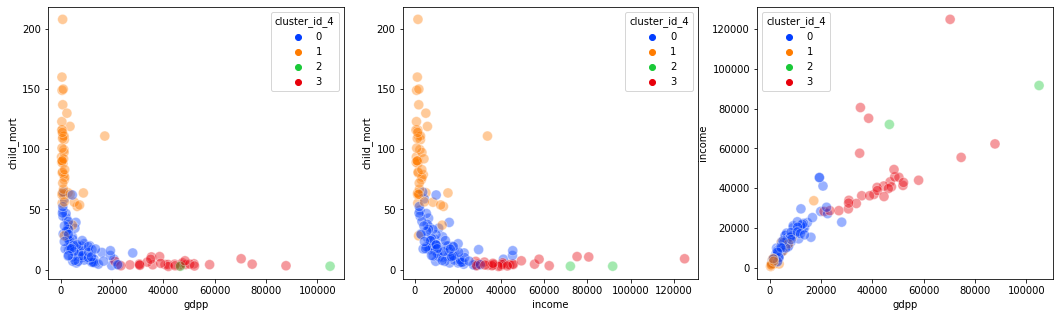

In [57]:
# plt.figure(figsize=(18, 5))
# plt.subplot(1, 3, 1)
# sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.subplot(1, 3, 2)
# sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.subplot(1, 3, 3)
# sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.show()


In [58]:
# cntry_data_k.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_3
cluster_id_4,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,0.000000
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,0.000000,0.000000,2.000000
3,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379,0.586207,0.586207,1.103448
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,1.000000


In [59]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

# cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
82,Kuwait,10.8,75200,38500
23,Brunei,10.5,80600,35300
123,Qatar,9.0,125000,70300
157,United Arab Emirates,8.6,57600,35000
159,United States,7.3,49400,48400
98,Malta,6.8,28300,21100
111,New Zealand,6.2,32300,33700
29,Canada,5.6,40700,47400
158,United Kingdom,5.2,36200,38900
7,Australia,4.8,41400,51900


In [60]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

# cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
37,"Congo, Dem. Rep.",116.0,609,334
25,Burkina Faso,116.0,1430,575


##K-means Clustering
##No.of Clusters=5

In [61]:
## K Means with with k=5
# kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
# kmeans_5.fit(scaled_data)
# kmeans_5.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [62]:
# assigning the label
# cntry_data_k['cluster_id_5'] = kmeans_5.labels_
# cntry_data_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4,cluster_id_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,2,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,2,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,2,0,0


In [63]:
# Checking the number of countries in each cluster

# cntry_data_k.cluster_id_5.value_counts()


0    87
1    47
3    30
2     2
4     1
Name: cluster_id_5, dtype: int64

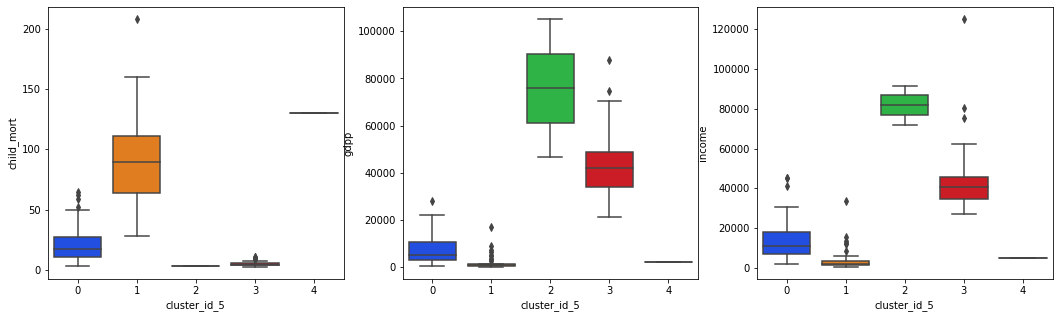

In [64]:
# plt.figure(figsize=(18, 5))
# plt.subplot(1, 3, 1)
# sns.boxplot(x='cluster_id_5', y='child_mort',
#             data=cntry_data_k, palette="bright")
# plt.subplot(1, 3, 2)
# sns.boxplot(x='cluster_id_5', y='gdpp',
#             data=cntry_data_k, palette="bright")
# plt.subplot(1, 3, 3)
# sns.boxplot(x='cluster_id_5', y='income',
#             data=cntry_data_k, palette="bright")

# plt.show()

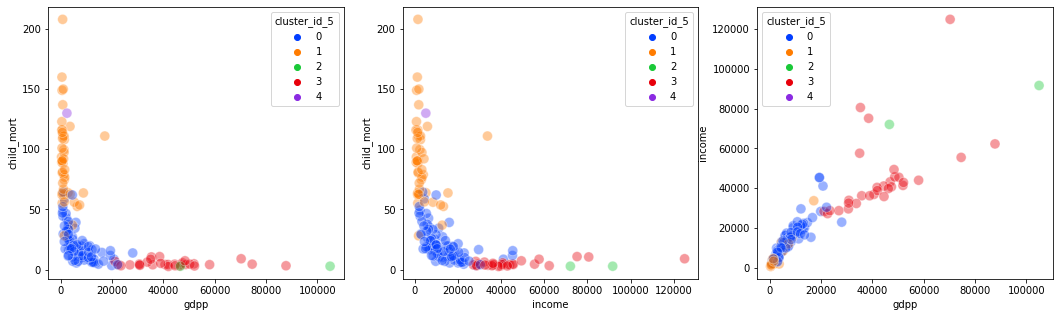

In [65]:
# plt.figure(figsize=(18, 5))
# plt.subplot(1, 3, 1)
# sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.subplot(1, 3, 2)
# sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.subplot(1, 3, 3)
# sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',
#                 data=cntry_data_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
# plt.show()

In [66]:
# Checking the CLuster means:
# cntry_data_k.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_3,cluster_id_4
cluster_id_5,,,,,,,,,,,,,
4,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000,3.000000,0.000000,1.0
1,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,0.000000,0.000000,1.0
0,21.113793,3328.149408,460.000120,3404.497944,13297.586207,7.371506,73.147126,2.251954,7158.298851,0.000000,0.000000,2.000000,0.0
3,5.043333,21018.310000,4031.304333,17806.070000,45180.000000,2.764533,80.383333,1.799667,43300.000000,0.566667,0.566667,1.133333,2.9
2,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,1.000000,2.0


In [67]:

# cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_5'] == 4].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
113,Nigeria,130.0,5150,2330


In [68]:

# cntry_data_k[['country','child_mort','income','gdpp']][cntry_data_k['cluster_id_5'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
14,Belarus,5.5,16200,6030
41,Croatia,5.5,20100,13500
51,Estonia,4.5,22700,14600
138,South Korea,4.1,30400,22100


##Choosing the model
From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL



##Interpreting the Clusters from K-Means model¶

In [69]:

cntry_data_k_analysis =  cntry_data_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
cntry_data_k_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_4,cluster_id_5
cluster_id_3,,,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,1.062500
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.098901,0.131868
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.928571,2.928571


In [70]:

cntry_data_k_analysis['Observations']=cntry_data_k[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
cntry_data_k_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_label_3,cluster_label_4,cluster_id_4,cluster_id_5,Observations
cluster_id_3,,,,,,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,1.062500,48
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.098901,0.131868,91
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.928571,2.928571,28


In [71]:

cntry_data_k_analysis['Proportion']=round(cntry_data_k_analysis['Observations']/cntry_data_k_analysis['Observations'].sum(),2)


#Summary View
cntry_data_k_analysis[['child_mort','income','gdpp','Observations','Proportion']]

,child_mort,income,gdpp,Observations,Proportion
cluster_id_3,,,,,
0,91.610417,3897.354167,1909.208333,48,0.29
2,20.357143,13968.021978,7979.912088,91,0.54
1,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

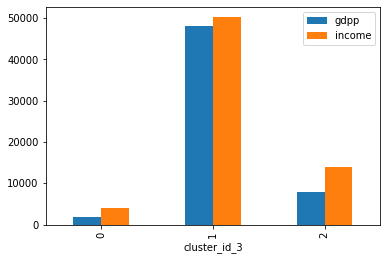

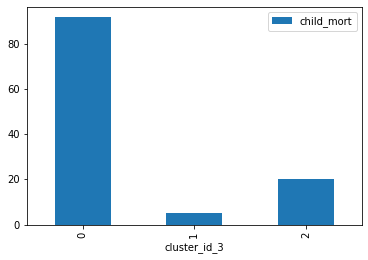

In [72]:
plt.figure(figsize=(8, 5))
cntry_data_k_plot1=cntry_data_k[['cluster_id_3','gdpp','income']].copy()
cntry_data_k_plot1=cntry_data_k_plot1.groupby('cluster_id_3').mean()
cntry_data_k_plot1.plot.bar()

cntry_data_k_plot2=cntry_data_k[['cluster_id_3','child_mort']].copy()
cntry_data_k_plot2=cntry_data_k_plot2.groupby('cluster_id_3').mean()
cntry_data_k_plot2.plot.bar()

In [73]:
cntry_data_k_analysis = cntry_data_k_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [74]:
cntry_data_k_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

,cluster_id_3,child_mort,income,gdpp,Observations,Proportion
0,Developing Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Under_Developed Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


In [75]:
cntry_data_k_analysis[['cluster_id_4','child_mort','income','gdpp','Observations','Proportion']]

,cluster_id_4,child_mort,income,gdpp,Observations,Proportion
0,1.000000,91.610417,3897.354167,1909.208333,48,0.29
1,0.098901,20.357143,13968.021978,7979.912088,91,0.54
2,2.928571,5.046429,50178.571429,48114.285714,28,0.17


In [76]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = cntry_data_k[cntry_data_k['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]

In [77]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

,country,child_mort,income,gdpp
109,Nepal,47.0,1990,592
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
27,Cambodia,44.4,2520,786
83,Kyrgyz Republic,29.6,2790,880
...,...,...,...,...
122,Portugal,3.9,27200,22500
135,Slovenia,3.2,28700,23400
60,Greece,3.9,28700,26900
10,Bahamas,13.8,22900,28000


In [78]:
final_cluster.describe()

,child_mort,income,gdpp
count,91.000000,91.000000,91.000000
mean,20.357143,13968.021978,7979.912088
std,14.067394,9326.576390,6773.212754
min,3.200000,1990.000000,592.000000
25%,10.300000,7010.000000,3015.000000
50%,17.200000,11200.000000,5450.000000
75%,26.300000,18900.000000,11250.000000
max,64.400000,45400.000000,30600.000000


In [79]:
Under_Developed_Countries = cntry_df[cntry_df['gdpp'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [80]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
88,Liberia,89.3,327,700
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
93,Madagascar,62.2,413,1390
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
50,Eritrea,55.2,482,1420


In [81]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

,country,child_mort,gdpp,income
26,Burundi,93.6,231,764
37,"Congo, Dem. Rep.",116.0,334,609
112,Niger,123.0,348,814
132,Sierra Leone,160.0,399,1220
106,Mozambique,101.0,419,918
31,Central African Republic,149.0,446,888
94,Malawi,90.5,459,1030
150,Togo,90.3,488,1210
64,Guinea-Bissau,114.0,547,1390
0,Afghanistan,90.2,553,1610


In [82]:
UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()
#Final countries list

UDC_top_10

,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2


In [83]:
UDC_top_10.describe()


,gdpp,income,child_mort
count,10.00000,10.000000,10.00000
mean,422.40000,1045.300000,112.76000
std,99.62396,309.034356,25.11344
min,231.00000,609.000000,90.20000
25%,360.75000,832.500000,91.27500
50%,432.50000,974.000000,107.50000
75%,480.75000,1217.500000,121.25000
max,553.00000,1610.000000,160.00000


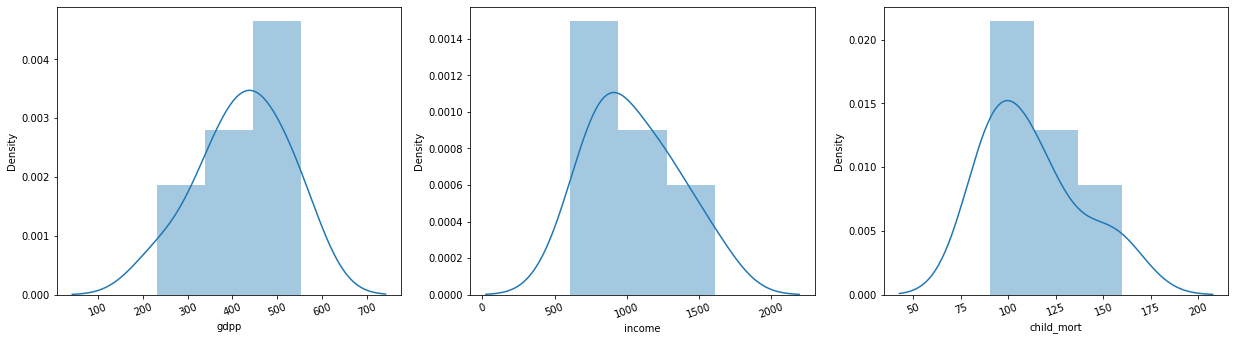

In [84]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

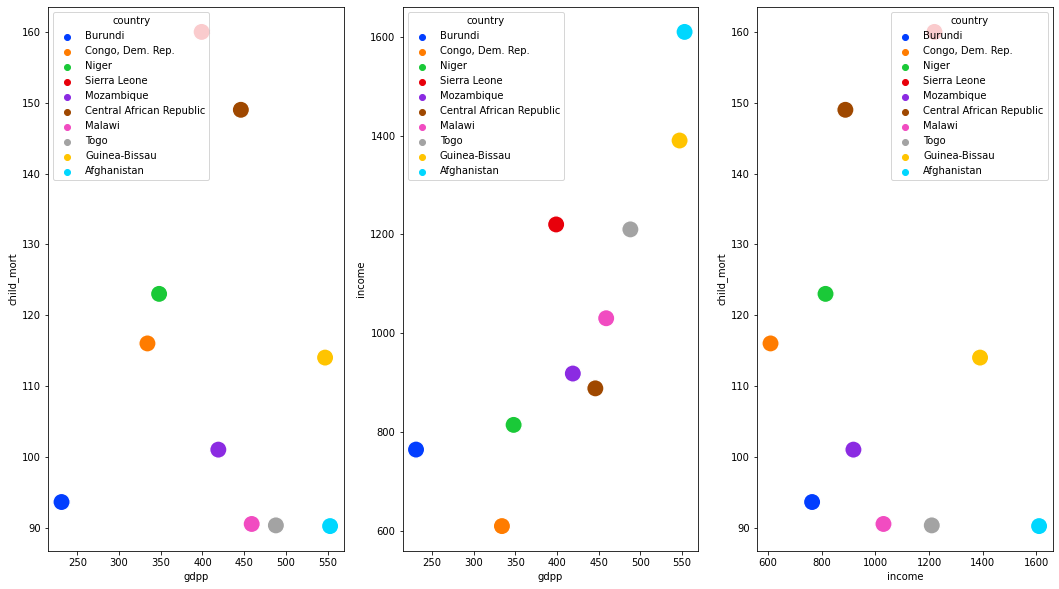

In [85]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

In [86]:
UDC_top_10


,country,gdpp,income,child_mort
26,Burundi,231,764,93.6
37,"Congo, Dem. Rep.",334,609,116.0
112,Niger,348,814,123.0
132,Sierra Leone,399,1220,160.0
106,Mozambique,419,918,101.0
31,Central African Republic,446,888,149.0
94,Malawi,459,1030,90.5
150,Togo,488,1210,90.3
64,Guinea-Bissau,547,1390,114.0
0,Afghanistan,553,1610,90.2
